<a href="https://colab.research.google.com/github/AlenaPotato/pet_projects/blob/main/marketing_ab_testing/Marketing_A_B_testing_from_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The current dataset was taken from <a href='https://www.kaggle.com/code/hongeunlee/marketing-a-b-testing'>Marketing A/B testing</a> from Kaggle platform.


# Importing libraries and the file

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("pastel")

In [ ]:
df = pd.read_csv('/content/marketing_AB.csv', index_col=0)
display(df.head())

print(f'DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns')

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


DataFrame contains 588101 rows and 6 columns


In [ ]:
print('There are missing values.' if df.isna().sum().all()>0 else 'There are no missing values.' )
print('There are duplicated values.' if df[df.duplicated()].sum().all()>0 else 'There are no duplicated values.' )

There are no missing values.
There are no duplicated values.


In [ ]:
df['converted'] = df['converted'].astype('int')
display(np.round(df.describe(),2))
display(df.describe(include=[object]))

,user id,converted,total ads,most ads hour
count,588101.00,588101.00,588101.00,588101.00
mean,1310692.22,0.03,24.82,14.47
std,202225.98,0.16,43.72,4.83
min,900000.00,0.00,1.00,0.00
25%,1143190.00,0.00,4.00,11.00
50%,1313725.00,0.00,13.00,14.00
75%,1484088.00,0.00,27.00,18.00
max,1654483.00,1.00,2065.00,23.00


,test group,most ads day
count,588101,588101
unique,2,7
top,ad,Friday
freq,564577,92608


# Exploratory Analysis

In [ ]:
df.groupby('user id').count().max()

test group       1
converted        1
total ads        1
most ads day     1
most ads hour    1
dtype: int64

There is only one entry in df for every user.

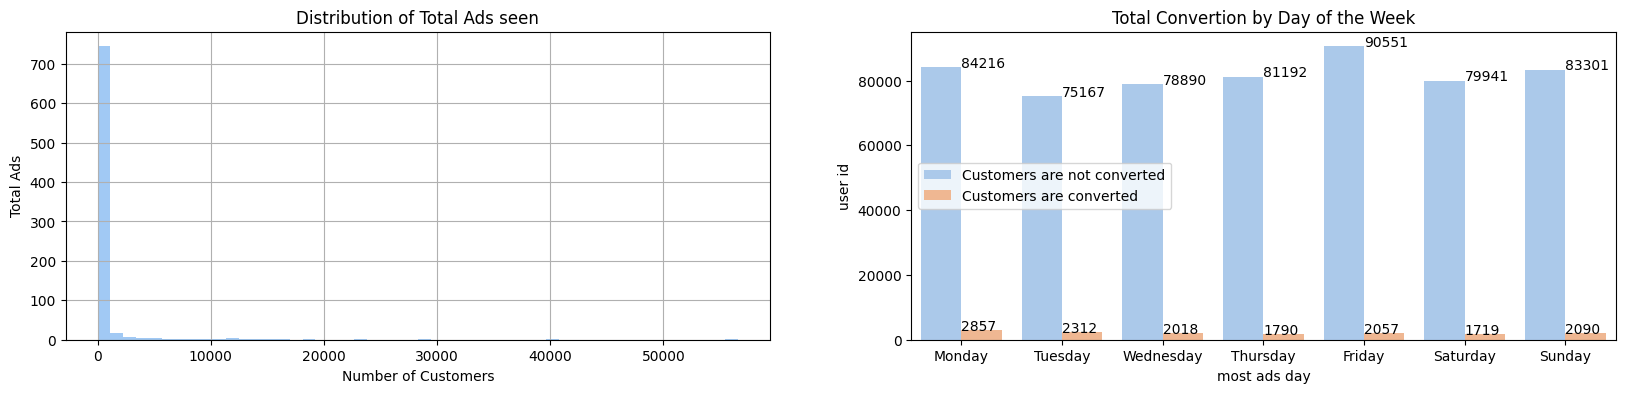

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))

df.groupby('total ads').count().iloc[:,0].hist(ax=ax[0], bins=50)
ax[0].set_title('Distribution of Total Ads seen')
ax[0].set_ylabel('Total Ads')
ax[0].set_xlabel('Number of Customers')

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
s = df.groupby(['most ads day', 'converted'], as_index=False).agg({'user id':'count'})
s['most ads day'] = pd.Categorical(s['most ads day'], categories=cats, ordered=True)
s = s.sort_values('most ads day').reset_index(drop=True)
s.loc[s.converted == 0,'converted'] = 'Customers are not converted'
s.loc[s.converted == 1,'converted'] = 'Customers are converted'
sns.barplot(data=s, x='most ads day', y='user id', hue='converted', ax=ax[1])
for i in s.index:
  ax[1].annotate(str(s.loc[i, 'user id']), xy=(i//2, s.loc[i, 'user id']))
ax[1].legend(loc='center left')
ax[1].set_title('Total Convertion by Day of the Week')

plt.show()

In [ ]:
small_amount_of_ads = [1, 5, 10, 20, 50, 100, 500, 1000]

for amount in small_amount_of_ads:
  percent = np.round(df[df['total ads']<=amount].shape[0] / df.shape[0] * 100,2)
  print(f"{amount}{' '*(4-len(str(amount)))}  or fewer ads were seen by {percent} %{' '*(5-len(str(percent)))}  of users.")

1     or fewer ads were seen by 9.63 %   of users.
5     or fewer ads were seen by 30.24 %  of users.
10    or fewer ads were seen by 44.34 %  of users.
20    or fewer ads were seen by 66.02 %  of users.
50    or fewer ads were seen by 88.26 %  of users.
100   or fewer ads were seen by 96.08 %  of users.
500   or fewer ads were seen by 99.9 %   of users.
1000  or fewer ads were seen by 99.99 %  of users.


Distribution of Total Ads seen by Customers is highly skewed.
We can conclude that around 5000 customers have seen ads up to 700 times per visit. Such skewness may be caused by ad blockers or some other technical issues. I would not consider such scenarios as outliers. But most customers (88%) saw 50 or less ads per one visit. <br>

The most ads were viewed on Friday, and the least ads were viewed on Tuesday. We can not conclude which day was the most profitable in terms of conversion though. We only can see how many people attended the website and how many of them were converted during the specific day. For gaining more information some additional relative metrics are needed.

In [ ]:
# print('Accounting users ')
for day in s['most ads day'].unique():
  temp = s[s['most ads day']==day]
  temp.reset_index(drop=True, inplace=True)
  tot = temp['user id'][0] + temp['user id'][1]
  a = np.round(temp['user id'][0]/(tot)*100,3)
  b = np.round(temp['user id'][1]/(tot)*100,3)
  c = np.round(temp['user id'][1]/(s['user id'].sum())*100,3)
  print(f"On {day}{' '*(9-len(day))} {b} % of users made purchases out of {tot} people who attended the website during that specific day. And only {' '*(5-len(str(c)))}{c} % of users considering the whole week conversion.")


On Monday    3.281 % of users made purchases out of 87073 people who attended the website during that specific day. And only 0.486 % of users considering the whole week conversion.
On Tuesday   2.984 % of users made purchases out of 77479 people who attended the website during that specific day. And only 0.393 % of users considering the whole week conversion.
On Wednesday 2.494 % of users made purchases out of 80908 people who attended the website during that specific day. And only 0.343 % of users considering the whole week conversion.
On Thursday  2.157 % of users made purchases out of 82982 people who attended the website during that specific day. And only 0.304 % of users considering the whole week conversion.
On Friday    2.221 % of users made purchases out of 92608 people who attended the website during that specific day. And only  0.35 % of users considering the whole week conversion.
On Saturday  2.105 % of users made purchases out of 81660 people who attended the website durin

Now we can see that the most profitable day in terms of conversoion was Monday. Almost 0.5% of the whole week sales were made on that day. And the least profitable day was Saturday.

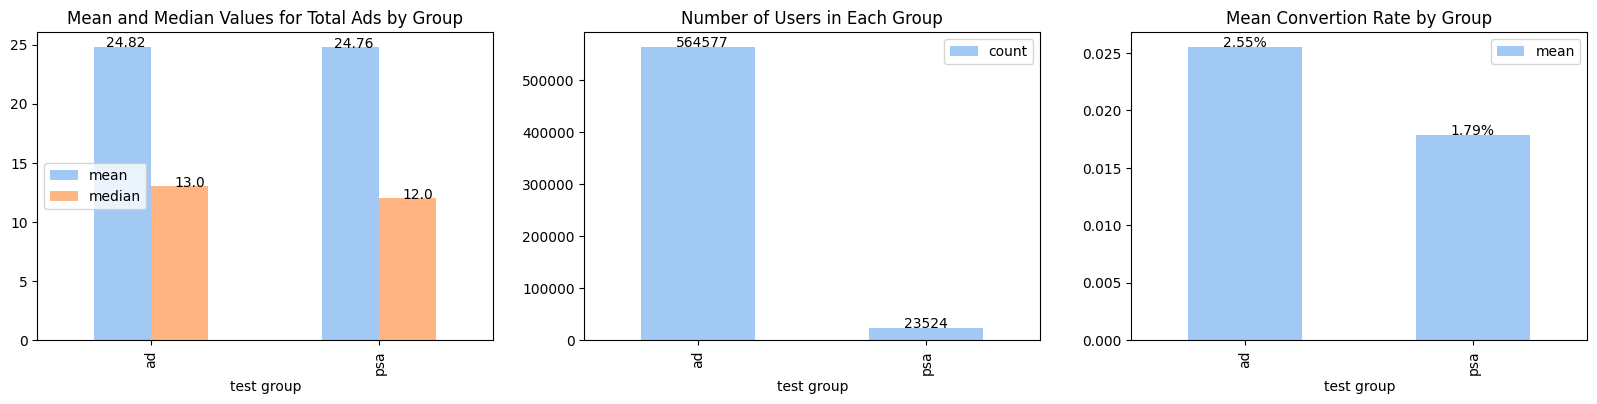

In [ ]:
t = df.groupby('test group').agg({'user id':'count', 'converted':'mean', 'total ads':['mean', 'median']})

fig, ax = plt.subplots(1, 3, figsize=(20,4))

t['total ads'].plot(kind='bar', ax=ax[0])
ax[0].legend(loc='center left')
ax[0].set_title('Mean and Median Values for Total Ads by Group')
for i in range(2):
  ax[0].annotate(str(np.round(t.iloc[i, 2],2)), xy=(i-0.2, t.iloc[i, 2]))
  ax[0].annotate(str(np.round(t.iloc[i, 3],2)), xy=(i+0.1, t.iloc[i, 3]))

t['user id'].plot(kind='bar', ax=ax[1])
ax[1].set_title('Number of Users in Each Group')
for i in range(2):
  ax[1].annotate(str(t.iloc[i, 0]), xy=(i-0.1, t.iloc[i, 0]))


t['converted'].plot(kind='bar', ax=ax[2])
ax[2].set_title('Mean Convertion Rate by Group')
for i in range(2):
  ax[2].annotate(str(np.round(t.iloc[i, 1]*100,2)) + '%', xy=(i-0.1, t.iloc[i, 1]))

plt.show()

Mean values for different groups are roughly equal (aproximately 24 ads per person). Bearing in mind the fact that distribution of total ads seen by customers is highly skewed it's better to use median values to evaluate average amount of ads seen by person. Based on this fact we can conclude that total amount of ads seen by different group slightly differs: 13 ads per person in control group and 12 ads per person in test group.

23 252 people saw Public Service Announcement. It is aproximately 4% out of the 588 101 people who were exposed to any of company's marketing campaign. The convertion rate for users who have seen the special advertisement is 2.5% and for those who haven't is 1.79%.

# A/B test
We have gained some insights of our dataset. Now it's time to answer our business questions:
- Would the campaign be successful?
- If the campaign was successful, how much of that success could be attributed to the ads?

Those questions imply some hypotheses testing. We can consider convertion rate as the quantitative variable (mean convertion rate) and marketing group as categorical variable. For such instances proportion z-test would be suitable.


The hypotheses are as follows: <br>
$H_0:\mu_{ad} = \mu_{psa}  $ <br>
$H_1:\mu_{ad} > \mu_{psa}  $ <br>

Or in other words: is mean convertion rate among different types of advertisement are the same (H0) or do they differ (H1)? Did special ad bring some extra conversion?


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

successes = df.groupby(['converted', 'test group'])['user id'].count()[2:].values
n_obs = df.groupby(['test group'])['user id'].count().values

test_stat, pvalue = proportions_ztest(count=successes, nobs=n_obs, alternative='larger')

print(f'Test Stat = {test_stat}, p-value = {pvalue}')

Test Stat = 7.3701, p-value = 0.0000


Since our p-value is below the critical value of 5%, we reject the null hypothesis. At this significance level, it can be concluded that mean convertion rate of special advertisement is greater that the one of public service announcement.


# Conclusions
We can say with confidence that campaign would be successful. According to our A/B testing, we saw a signficant difference conversion rates between the two types of advertisement. Judging by conducted EDA, special advertisement would bring 0.76% more conversion than the public service announcement.
